## This explores the variability of AMOC time series.

In [160]:
import pandas as pd
import os

# Preprocessing, and import data here
data_path = r"C:\Users\nd20983\docs\Simulations\data\xpgx"
amoc_timeseries_file = 'AMOC_time_series.xls'
path_amoc = os.path.abspath(os.path.join(data_path, amoc_timeseries_file))
data_out = r"C:\Users\nd20983\docs\Paper\THESIS\chapter2_AMOC\figures"
file_out = "AMOC_threshold.png"
path_out = os.path.abspath(os.path.join(data_out, file_out))
df = pd.read_excel(path_amoc, skiprows=1, sheet_name=['Rc_thres'])['Rc_thres']
print(df)

       year    xpgxr    xpxma    xpxmb    xpxmc    xpxmd    xpgxa  Unnamed: 7  \
0       0.5  13.8671  14.3186  13.7657  14.0154  14.4299  12.5710         NaN   
1       1.5   15.819  14.8729  14.3447  14.0775  15.2623  14.2250         NaN   
2       2.5  14.6562  14.0169  15.1938  14.1569  14.4135  13.9907         NaN   
3       3.5  14.2034  14.8742  15.4811   16.001  15.3787  14.3581         NaN   
4       4.5  14.5275  15.6326  15.4727  14.7971  15.2701  14.2661         NaN   
...     ...      ...      ...      ...      ...      ...      ...         ...   
1004  xpxmd      0.9    16.54     0.58     0.28      NaN      NaN         NaN   
1005  xpxmc      0.7    14.18     0.58     0.26      NaN      NaN         NaN   
1006  xpxmb      0.5    10.31     0.54     0.23      NaN      NaN         NaN   
1007  xpgma      0.3     7.62     0.95     0.51      NaN      NaN         NaN   
1008  xpgxr        0     4.78     0.51     0.14      NaN      NaN         NaN   

      Unnamed: 8  Unnamed: 

In [72]:
# HERE WE DO THE ANALYSIS ON THE AMOC TIME SERIES
# df_1000 = df[['year','xpgxr','xpxma','xpxmb','xpxmc','xpxmd','xpgxa']]
length = 500
print(f'Analysis on the last {length} years:')
df_1000 = df.iloc[:,[0,1,2,3,4,5,6]].iloc[1000-length:1000]
# print(f'raw_data:\n{df_1000}')
# drop the 'year' column
data = df_1000.drop(columns='year')
# print(f'data to analyse:\n{data}')
# step 1: Get anomalies
anomalies = data.apply(lambda x:x - x.mean())
# print(f'anomalies:\n{anomalies}')
# step 2: Interannual variability
interannual_var = anomalies.var()
print(f'interannual_var:\n{interannual_var}')
# step 3: Decadal variability
# smooth with a 10-year rolling mean and compute variance again
decadal_smoothed = anomalies.rolling(window=10, center=True).mean()
# print(f'decadal_smoothed data:\n{decadal_smoothed}')
decadal_var = decadal_smoothed.var()
print(f'decadal_var:\n{decadal_var}')

Analysis on the last 500 years:
interannual_var:
xpgxr    0.512389
xpxma    0.948619
xpxmb    0.537476
xpxmc    0.578643
xpxmd    0.576217
xpgxa    0.490873
dtype: object
decadal_var:
xpgxr    0.140567
xpxma    0.511735
xpxmb    0.227259
xpxmc    0.255317
xpxmd    0.283986
xpgxa    0.219023
dtype: float64


1002   expt topography   AMOC interannual var decadal var
1003  xpgxa          1  14.53            0.49        0.21
1004  xpxmd        0.9  16.54            0.58        0.28
1005  xpxmc        0.7  14.18            0.58        0.26
1006  xpxmb        0.5  10.31            0.54        0.23
1007  xpgma        0.3   7.62            0.95        0.51
1008  xpgxr          0   4.78            0.51        0.14


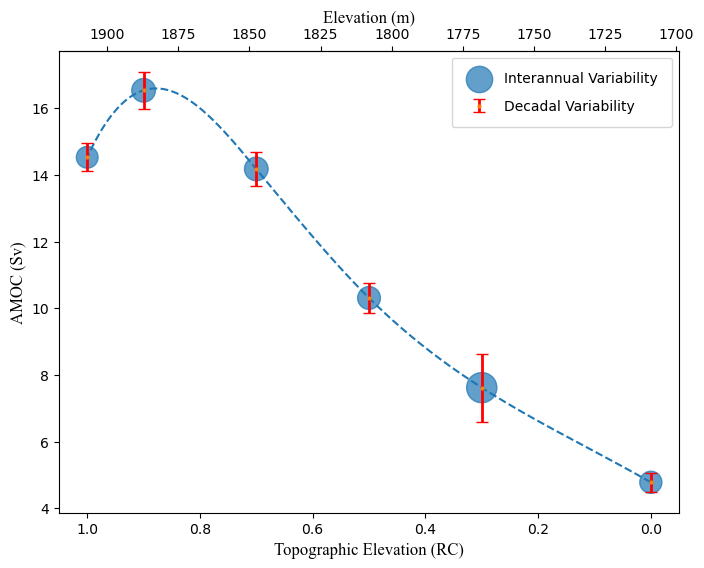

In [161]:
# Plot the AMOC threshold figure
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

df_fig = df.iloc[:,[0,1,2,3,4,]].iloc[1002:1011]
df_fig.columns = df_fig.iloc[0]
df_fig = df_fig.drop([1002])
df_fig_sorted = df_fig.sort_values(by='topography')
print(df_fig)

# interpolation
x = df_fig_sorted['topography']
y = df_fig_sorted['AMOC']
x_smooth = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x_smooth)

# format conversion
df_fig_sorted['topography'] = df_fig_sorted['topography'].astype(float)
df_fig_sorted['AMOC'] = df_fig_sorted['AMOC'].astype(float)
df_fig_sorted['interannual var'] = df_fig_sorted['interannual var'].astype(float)
df_fig_sorted['decadal var'] = df_fig_sorted['decadal var'].astype(float)
# parameters
font_label = {'family': 'Times New Roman',
              'weight': 'normal',
              'size': 12
             }
# marker size and error bars
size_scale = 500
sizes = df_fig_sorted['interannual var'].astype(float) * size_scale
errors = df_fig_sorted['decadal var']
# figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

smoothed = ax.plot(x_smooth, y_smooth, linestyle='--',)
ivar = ax.scatter(x, y, s=sizes, color='tab:blue', label='Interannual Variability',
                  marker='o', alpha=0.7)
dvar = ax.errorbar(x, y, yerr=2*errors, fmt='o', markersize=2, ecolor='red',
                   elinewidth=2, capsize=4, label='Decadal Variability')
# axis
ax.invert_xaxis()
ax.set_xlabel("Topographic Elevation (RC)", fontdict=font_label)
ax.set_ylabel("AMOC (Sv)", fontdict=font_label)
secax = ax.secondary_xaxis('top',
                           functions=(lambda x: 1709 + x * (1907 - 1709),
                                      lambda e: (e - 1709) / (1907 - 1709)))
secax.set_xlabel('Elevation (m)', fontdict=font_label)
# legend, captions, anotations
ax.legend(fontsize=10, frameon=True, loc='best', labelspacing=1.0, borderpad=1.0)
fig.savefig(path_out, format='png', dpi=150)